# Декомпозиция. 


**Цель**: Уменьшить отток клиентов банка. 

**Задача**: Сегментировать клиентов банка и выявлением особенности каждой из групп для улучшения вовлеченности, сформировать рекомендации для каждого из сегментов. 

**План работы:**
  1. ***Загрузка данных и библиотек***
  
  2. **Предобработка.** В данном пунтке мы рассмотрим наш набор данных, проанализируем его на наличие явных и неявных дубликатов, пропусков, выбросов. 
  
  3. ***Исследовательский анализ данных.*** Исследование распределение в признаках, какие-то зависимостей. 
  
  4. ***Сегментация/описание портретов сегментов.*** Распеределение данных на сегменты, описание портретов получивших сегментов, выявление сильных и слабых сторон. Определение заинтересованности клиентов в каждом из сегментов. 
  
  5. ***Статистическая проверка гипотез.*** Предположение гипотез на основе данных полученных в предыдущих пунктах. 
  
  6. ***Выводы, рекомендации по удержанию.*** Описание продуктовых рекомендации по каждому из сегментов. 
  

# Сегментация пользователей  банка по потреблению

**Задача**:

Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

- Проведите исследовательский анализ данных,
- Сегментируйте пользователей на основе данных о количестве потребляемых продуктов,
- Сформулируйте и проверьте статистические гипотезы.
    
*Проверьте гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*
    
*Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.*
    

(задачи выше сформулированы предварительно, окончательная постановка задачи произойдёт на вводной встрече)


**Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Equity` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно **обязательно** в формате **pdf**.

## Загрузка данных

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from scipy import stats as st

In [2]:
def one_plot_creator(df, x, y, text=None,
                     title='default tittle', xaxis_title='default xaxis tittle', yaxis_title='default yaxis tittle',
                     legend_title= None, 
                     orientation='v', height=500, showlegend=True, hue = None):

    plt.figure(figsize=(15, 5))
    sns.barplot(x=x , y=y, data=df, alpha=0.6, orient=orientation, hue = hue, palette="rainbow")
    plt.title(title)
    plt.xlabel(xaxis_title)
    plt.ylabel(yaxis_title)
    plt.legend(title=legend_title, bbox_to_anchor=(1,0.8)) 
    
    return fig

def pie_plot(df, labels, title = 'default tittle',legend_title = 'default legend tittle'):
    colors = ['lightblue', 'pink', 'purple', 'grey', 'gold']
    
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.pie(df, labels = labels, autopct='%.0f%%',colors = colors)
    plt.legend(title=legend_title, bbox_to_anchor=(1, 0.6))
    plt.show()
    
    return fig

In [3]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
data = pd.read_csv(path)

data.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


## Предобработка

### Дубликаты

In [4]:
#меняем название столбцов для удобства в дальнейшей работе 
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid':'user_id'})

#проверяем набор на дулибликаты
print(f'Количество дубликатов:{data.duplicated().sum()}')

#теперь в столбце город преведем названия к строчному типу, чтобы проверить неявные дубликаты
data['city'] = data['city'].str.lower()
print('Уникальные значения из столбца city:',data['city'].unique())

#проверим значения в столбце userid, так как это уникальный номер пользователя
print(f'Количество дубликатов userid:{data.duplicated().sum()}')

display(data[data['user_id'].duplicated()].sort_values(by='user_id'))


Количество дубликатов:0
Уникальные значения из столбца city: ['рыбинск' 'ярославль' 'ростов']
Количество дубликатов userid:0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7694,116540,887.0,ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5896,120258,905.0,ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
8638,123461,934.0,рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
9775,124450,758.0,рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9104,222480,776.0,рыбинск,Ж,NaN,5,796735.09,1,1,1,55073.63,0
8070,226550,940.0,рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0
4216,226719,903.0,рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0
8497,227795,839.0,ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0


Мы удалила полные дубликать, но остались одинаковые значения в столбце user_id, поэтому рассмотрим их поподробнее

In [5]:
display(data[data['user_id'] == 116540])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0


Как мы видим пользователи с одинаковыми user_id имеют совсем разное назначение. Разные строки обозначают разных людей. Один из них уже ушел из банка и не пользуется продукцией, а вот второй наоборот и можно предположить, что он недавно зарегистрировался. Скорее всего в банке для новых пользователй используются освободившиеся id пользователей. 

### Пропуски
Теперь проверим таблицу на содержание пустых значений

In [6]:
print ('Количество пустых значений:')
print (data.isnull().sum())

Количество пустых значений:
user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64


Как мы видимо пустные значения содержаться только в 2 столбцах - возраст и баланс. Посмотрим поподробнее на строки с пустными значениями. 

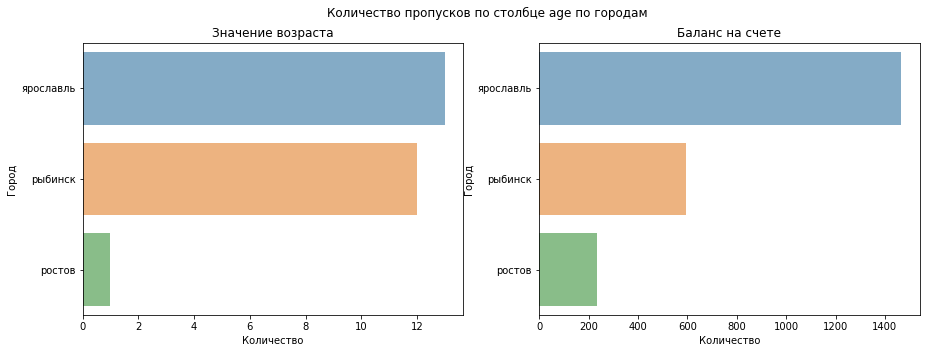

In [7]:
plotdata = pd.DataFrame({
    "age":[data[data['city'] == 'ярославль']['age'].isnull().sum(),data[data['city'] == 'рыбинск']['age'].isnull().sum(),data[data['city'] == 'ростов']['age'].isnull().sum()],
    "balance":[data[data['city'] == 'ярославль']['balance'].isnull().sum(),data[data['city'] == 'рыбинск']['balance'].isnull().sum(),data[data['city'] == 'ростов']['balance'].isnull().sum()],
    "city": ["ярославль","рыбинск","ростов"]
})


fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='age' , y='city', data=plotdata, alpha=0.6, orient='h', ax = ax)
ax.set_title("Значение возраста")
ax.set_xlabel("Количество")
ax.set_ylabel("Город")

sns.barplot(x='balance' , y='city', data=plotdata, alpha=0.6, orient='h', ax = ax1)
ax1.set_title("Баланс на счете")
ax1.set_xlabel("Количество")
ax1.set_ylabel("Город")

fig.suptitle("Количество пропусков по столбце age по городам")
plt.show()

Больше всего пропусков находится в городе Ярославль: в значении возраста 12 из 26 человек, а в значении баланса на счете около 1400 из 2295 общих пропусов. Но также нужно рассмотреть и общее количество человек в распределении по городам. 

No handles with labels found to put in legend.


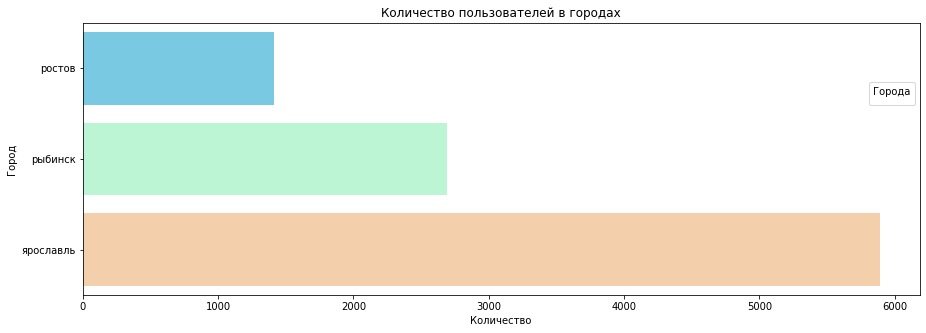

In [8]:
fig = one_plot_creator(
    df=data.groupby(by = 'city', as_index = False)['user_id'].count(),
    x='user_id', y='city',
    title='Количество пользователей в городах',
    xaxis_title='Количество',
    yaxis_title='Город',
    legend_title='Города',
    orientation='h',
    height=450
)
fig.show()

Теперь мы видим, что количество пользователей в разных города примерно одинаковые, так что распределение пропусков не связано с количеством людей.

Скорее всего это связано с тем, что люди в крупных городах менее ответсвенно походят к заполнению анкет. 

Теперь посмотрим разные возрастные категории: 18-25, 26-45, 46-60,большое 60 

No handles with labels found to put in legend.


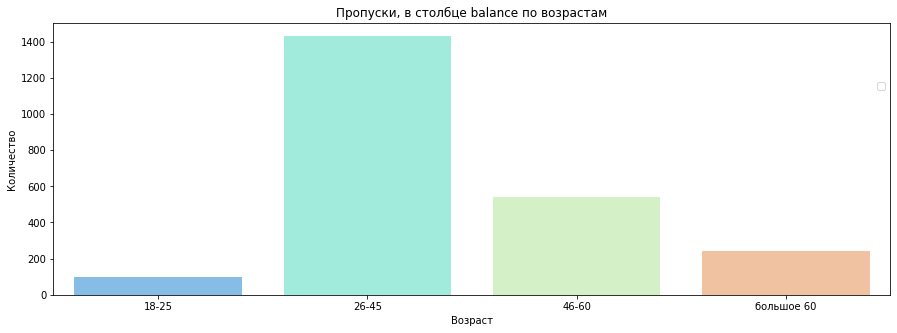

In [9]:
plotdata = pd.DataFrame({
    "balance":[data[(data['age'] >= 18)&(data['age'] <= 25)]['balance'].isnull().sum(),data[(data['age'] >= 26)&(data['age'] <= 45)]['balance'].isnull().sum(),data[(data['age'] >= 46)&(data['age'] <= 60)]['balance'].isnull().sum(),data[data['age'] >= 60]['balance'].isnull().sum()],
    "age": ["18-25","26-45","46-60","большое 60"]
})

fig = one_plot_creator(
    df=plotdata,
    x='age', y='balance',
    title='Пропуски, в столбце balance по возрастам',
    xaxis_title='Возраст',
    yaxis_title='Количество',
    orientation='v',
    height=450
)
fig.show()

Больше всего пропусков у возрастной группы 26-45, а меньше всего у возрастной категории 18-25. Но также посмотрим и количество людей, которые относятся к той или иной возрастной группе. 

No handles with labels found to put in legend.


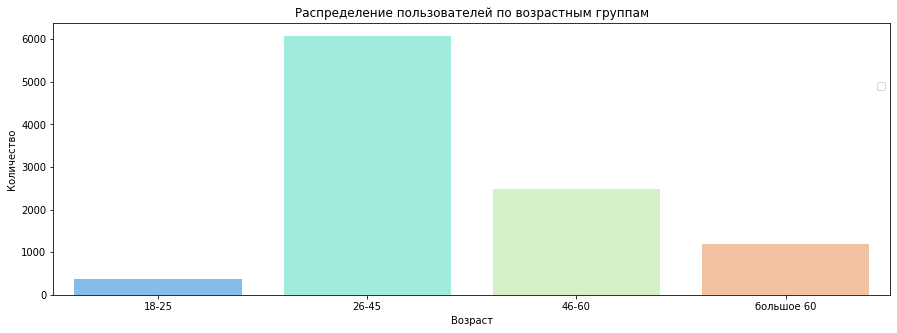

In [10]:
plotdata = pd.DataFrame({
    "count":[data[(data['age'] >= 18)&(data['age'] <= 25)]['user_id'].count(),data[(data['age'] >= 26)&(data['age'] <= 45)]['user_id'].count(),data[(data['age'] >= 46)&(data['age'] <= 60)]['user_id'].count(),data[data['age'] >= 60]['user_id'].count()],
    "age": ["18-25","26-45","46-60","большое 60"]
})

colors = sns.color_palette('pastel')[0:5]

fig = one_plot_creator(
    df=plotdata,
    x='age', y='count',
    title='Распределение пользователей по возрастным группам',
    xaxis_title='Возраст',
    yaxis_title='Количество',
    orientation='v',
    height=450
)
fig.show()

Как мы видимо количество пропусков в возрастных прямопорпоционально количеству пользователей. 

Также стоит посмотреть и пропуски в категория "ушедших" и "не ушедших" клиентов

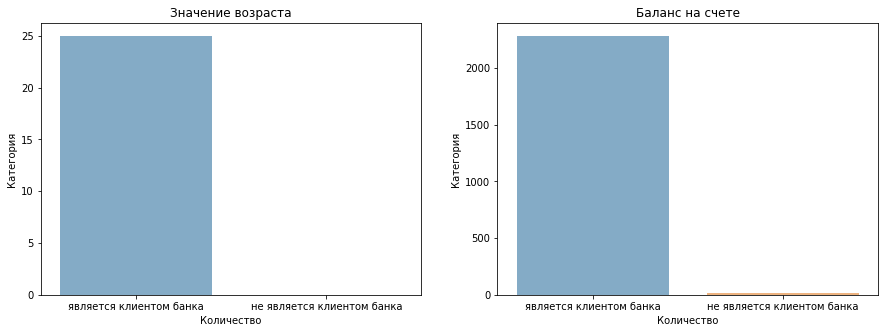

In [11]:
plotdata = pd.DataFrame({
    "balance":[data[data['churn'] == 0]['balance'].isnull().sum(),data[data['churn'] == 1]['balance'].isnull().sum()],
    "age":[data[data['churn'] == 0]['age'].isnull().sum(),data[data['age'] == 1]['balance'].isnull().sum()],
    "churn": ["является клиентом банка","не является клиентом банка"]
})


ig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='churn' , y='age', data=plotdata, alpha=0.6, orient='v', ax = ax)
ax.set_title("Значение возраста")
ax.set_xlabel("Количество")
ax.set_ylabel("Категория")

sns.barplot(x='churn' , y='balance', data=plotdata, alpha=0.6, orient='v', ax = ax1)
ax1.set_title("Баланс на счете")
ax1.set_xlabel("Количество")
ax1.set_ylabel("Категория")

fig.suptitle("Количество пропусков по категории клиентов")
plt.show()

No handles with labels found to put in legend.


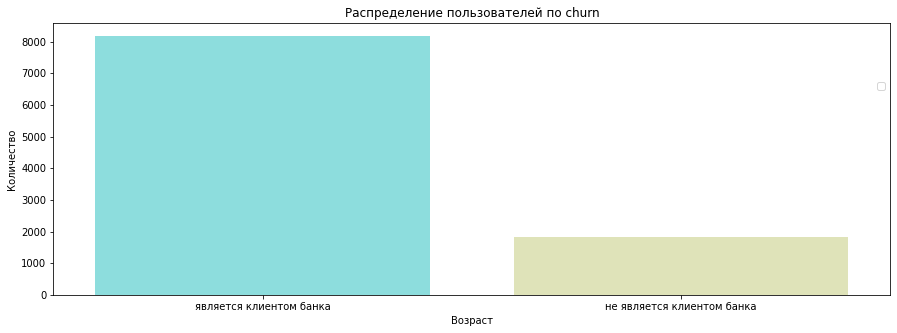

In [12]:
plotdata = pd.DataFrame({
    "count": [data[data['churn'] == 0]['user_id'].count(),data[data['churn'] == 1]['user_id'].count()],
    "churn": ["является клиентом банка","не является клиентом банка"]
})

fig = one_plot_creator(
    df=plotdata,
    x='churn', y='count',
    title='Распределение пользователей по churn',
    xaxis_title='Возраст',
    yaxis_title='Количество',
    orientation='v',
    height=450
)
fig.show()

Большое пользователей, которые являются клиентами банка, также и пропусков у них больше, что у тех, кто не является пользователем. Исключим пользователей, у которые не указан возраст и не указанная сумма баланса. 

### Выбросы

По пропускам стало понятно, теперь нужно выяснить есть ли выбросы в наших данных.

Так как значения в столбцах credit_card, last_activity, churn не могут быть больше 1, то просто проверим этот признак. А скоринговый балл не должен превышать 1000

In [13]:
print('Количество аномальных значений в столбце credit_card:', data[data['credit_card']>1]['credit_card'].count())
print('Количество аномальных значений в столбце last_activity:', data[data['last_activity']>1]['last_activity'].count())
print('Количество аномальных значений в столбце churn:', data[data['churn']>1]['churn'].count())
print('Количество аномальных значений в столбце score:', data[data['score']>1000]['score'].count())


Количество аномальных значений в столбце credit_card: 0
Количество аномальных значений в столбце last_activity: 0
Количество аномальных значений в столбце churn: 0
Количество аномальных значений в столбце score: 0


Как мы видим аномалий в этим столбцах нет, поэтому все отлично. Теперь проверим выбросы в столбцах по equity и products

Text(0.5, 1.0, 'Выбросы по столбцам ')

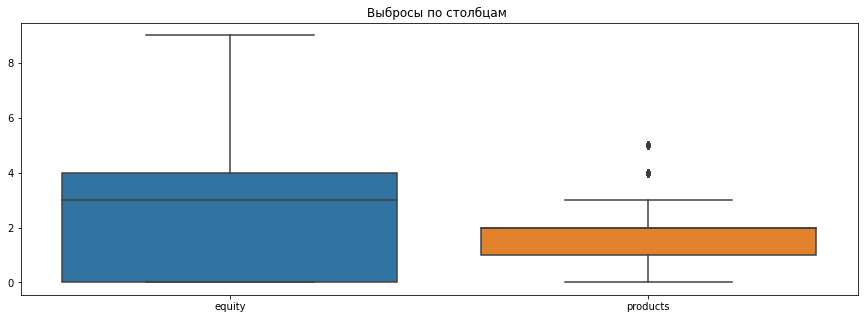

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(data = data[['equity','products']])
plt.title('Выбросы по столбцам ')

Выбросов в столбце equity нет, однако они присутствуют в столбце products. Рассмотрим поподробнее эти значения

In [15]:
display(data[data['products']>=4].groupby(by='city').agg({'products':'count'}).sort_values(by='products',ascending=False))

,products
city,
ярославль,321
рыбинск,100
ростов,72


Как мы видим большое количество продуктов банка являющееся выбросами находятся в Ярославле, это может быть обосновано тем, что это крупный город, в котором банк предлагает больше льготных условий для граждан. 

Предлагаю также посмотреть и на выбросы в значениях зарплат и баланса на счетах

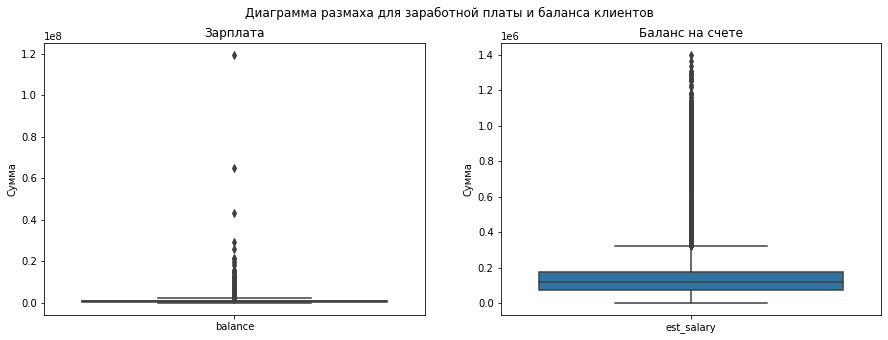

In [16]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data = data[['balance']], ax=ax)
ax.set_title("Зарплата")
ax.set_ylabel("Сумма")

sns.boxplot(data = data[['est_salary']], ax = ax1)
ax1.set_title("Баланс на счете")
ax1.set_ylabel("Сумма")

fig.suptitle("Диаграмма размаха для заработной платы и баланса клиентов")
plt.show()

In [17]:
display(data[data['balance']>12000000])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
125,227092,1000.0,ярославль,М,32.0,5,1.975718e+07,2,1,1,1024626.50,0
1027,119793,1000.0,ярославль,М,50.0,5,1.290969e+07,1,1,0,1253653.40,0
1059,114103,894.0,ярославль,М,58.0,4,6.486621e+07,2,1,1,88861.60,1
1846,114088,927.0,ярославль,М,57.0,5,4.327710e+07,3,0,1,82619.00,0
2318,168713,837.0,ярославль,М,62.0,5,1.282321e+07,1,1,1,21765.76,0
2597,226719,990.0,ярославль,М,37.0,4,1.464869e+07,2,0,0,934412.61,1
4005,163640,912.0,ярославль,М,35.0,4,1.562410e+07,2,0,1,1395064.45,0
4721,228786,1000.0,ярославль,М,45.0,5,2.900893e+07,2,0,1,811804.54,0
6318,163663,970.0,ярославль,М,35.0,3,1.500450e+07,2,0,1,991012.77,1
6817,179135,971.0,ярославль,Ж,38.0,4,1.484983e+07,2,0,0,788691.54,0


Мы получили значения формата "1.975718e+07", для тогоБ чтобы его привести к общему виду округлим наши значения в стобце до сотых

In [18]:
data['balance'] = round(data['balance'],1)

#выведим анамальное значение, которое сильно отличается от остальных
display(data[data['balance']>110000000])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7597,156149,900.0,ярославль,М,62.0,5,119113552.0,2,1,1,138041.31,0


Мы получили выборосное значение, которое стоит удалить, так как оно будет сильно влиять на анализ. Для примера посмотрим среднее значение по возрастной группе больше 60 лет

In [19]:
print('Среднее значение баланса в возрастной группе 60-80 лет:', round(data[(data['age']>=60)&(data['user_id']!=156149)]['balance'].mean()),2)

print('Медианное значение баланса в возрастной группе 60-80 лет:', data[(data['age']>=60)&(data['user_id']!=156149)]['balance'].median())


Среднее значение баланса в возрастной группе 60-80 лет: 851895 2
Медианное значение баланса в возрастной группе 60-80 лет: 612576.9


### **Вывод**

При предобработки данных у нас получилось: 
- Найти и удалить польные дубликаты. 
- Выяснить, что новым пользователям могут присваиваться номер id "ушедших" из банка клиент, чем вызваны дубликаты в столбце user_id
- Найти пропуски в значениях возраста и баланса на счете 
 * Пропуски при распределении по городам не связаны с количеством пользователей в городах. И по нашим преподложением это может быть связано с отношению клиентов из большого горда, которые не полностью заполняли свои анкеты
 * У разных возрастных групп и признака "клиент/не клиент" это связано с количеством в группах.
- Мы также нашли выбросы в значении баланса на счете и исключили его. 
- Остальные выбросы было решено не исключать, так как исключение может исказить дальнейший анализ.

## Исследовательский анализ данных 

В начале нашего исследования рассмотрим распределение клиентов по возрасту. 

### Исследование возрастной характеристики

No handles with labels found to put in legend.


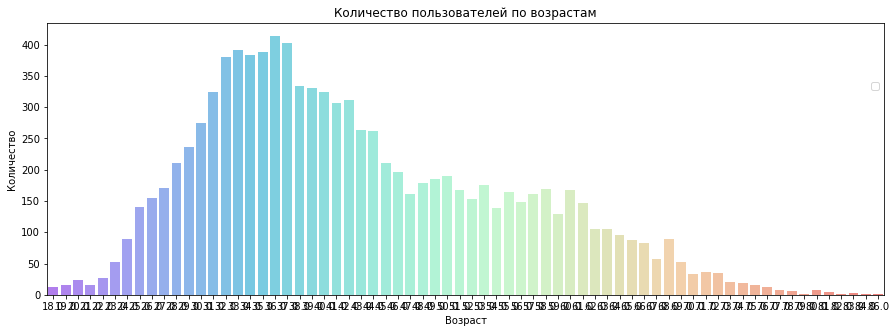

In [20]:
fig = one_plot_creator(
    df=data.groupby(by='age', as_index = False)['user_id'].count(),
    x='age', y='user_id',
    title='Количество пользователей по возрастам',
    xaxis_title='Возраст',
    yaxis_title='Количество',
    orientation='v',
    height=450
)
fig.show()

Клиенты находятся в промежутке между 18 и 86 годами. 
Самое большое количество клиентов находятся в возрастном промежутке 30-42 года. Меньше всего люди пользуются банком в возрасте 78-86 лет. 

### Расперделение по количеству продуктов

В дальнейшем посмотрим распределение пользователей по количеству продуктов. 

No handles with labels found to put in legend.


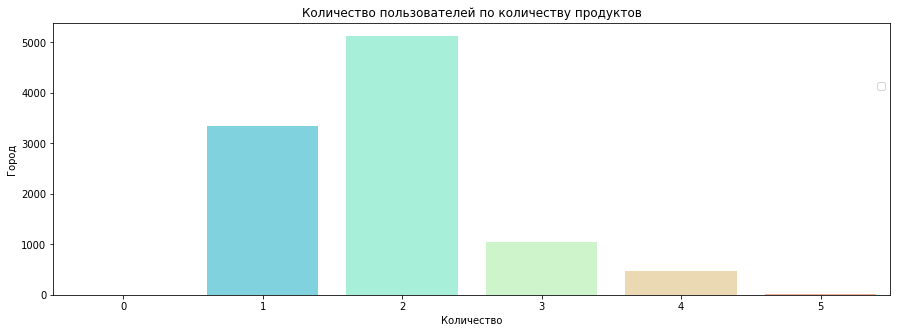

In [21]:
fig = one_plot_creator(
    df=data.groupby(by='products', as_index = False)['user_id'].count(),
    x='products', y='user_id',
    title='Количество пользователей по количеству продуктов',
    xaxis_title='Количество',
    yaxis_title='Город',
    orientation='v',
    height=450
)
fig.show()

Проверим точно ли нет клиентов, которые не владеют ни одни продуктом

In [22]:
data[data['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Скорее всего это клиент, который считается ушедшим, возможно он не смог найти для себя интересующего продукта 

In [25]:
data[data['products'] == 5]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
401,187761,868.0,ярославль,Ж,19.0,4,8126.9,5,1,1,85323.98,0
523,195914,852.0,ярославль,Ж,39.0,5,1388255.7,5,1,1,135432.48,1
893,132781,820.0,ярославль,М,37.0,5,259677.2,5,1,1,124261.01,0
1019,122402,833.0,ростов,М,32.0,3,234560.9,5,1,1,106033.79,0
1346,159649,847.0,ярославль,Ж,39.0,1,137974.0,5,1,1,219672.26,0
1479,209431,882.0,рыбинск,М,42.0,4,1142013.1,5,1,0,101051.78,1
1880,134758,850.0,ярославль,Ж,35.0,4,282262.3,5,1,1,105312.07,0
3274,155765,863.0,ярославль,М,30.0,5,1036114.5,5,1,1,150744.50,1
3809,191408,838.0,ростов,М,28.0,2,99461.5,5,1,1,88641.84,0
3884,138642,823.0,ярославль,Ж,37.0,1,118329.9,5,1,1,105095.05,0


Всего 19 клиентов, которые владеют 5 продуктами

Наибольшее количество продуктов - 5. Наименьшее количество - 0

Чаще всего клиенты выбирают 2 продукта, после 1 продукт. Меньше всего клиенты выбирают 5 продуктов.

### Распределение по владению кредитными картами
Теперь посмотрим, как идет распределение пользователей по наличию кредитной карты

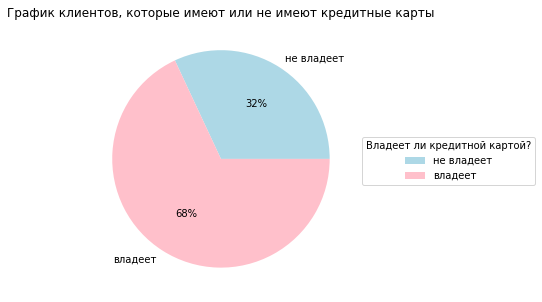

In [26]:
credit_card_gr = data.groupby(by='credit_card', as_index = False).agg({'user_id':'count'})

#Отрисуем распределение сетевых и не сетевых заведение по количеству 
fig = pie_plot(
    df = credit_card_gr['user_id'], 
    labels =  ["не владеет","владеет"], 
    title = "График клиентов, которые имеют или не имеют кредитные карты",
    legend_title = "Владеет ли кредитной картой?")
fig.show()

Как видно больше людей предпочитают использовать кредитные карты. 

### Гендерный тип
Посмотрим также и распредление по гендерному типу

No handles with labels found to put in legend.


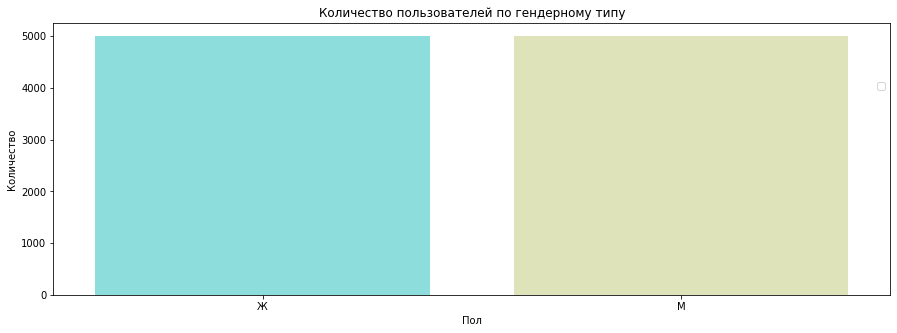

In [27]:
fig = one_plot_creator(
    df=data.groupby(by='gender', as_index = False)['user_id'].count(),
    x='gender', y='user_id',
    title='Количество пользователей по гендерному типу',
    xaxis_title='Пол',
    yaxis_title='Количество',
    orientation='v',
    height=450
)
fig.show()

Клиенты в равной мере распределяются между мужчинами и женщинами. 

### Исследование активных пользователей.

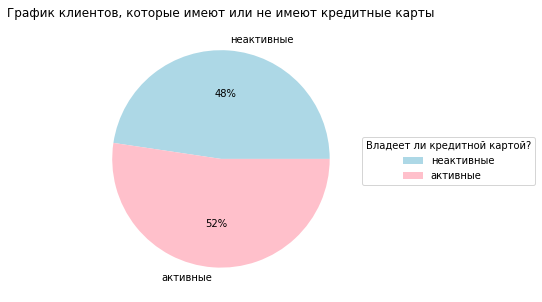

In [28]:
last_activity_gr = data.groupby(by='last_activity', as_index = False).agg({'user_id':'count'})

#Отрисуем распределение сетевых и не сетевых заведение по количеству 

fig = pie_plot(
    df = last_activity_gr['user_id'], 
    labels = ['неактивные','активные'], 
    title = 'График клиентов, которые имеют или не имеют кредитные карты',
    legend_title = "Владеет ли кредитной картой?")
fig.show()

В нашем наборе данных 52% активных пользователей и 48% неактивных пользователей. 

### Исследование баланса на счете 

Для данного исследования зависимостей переменных между друг другом с помощью тепловой карты

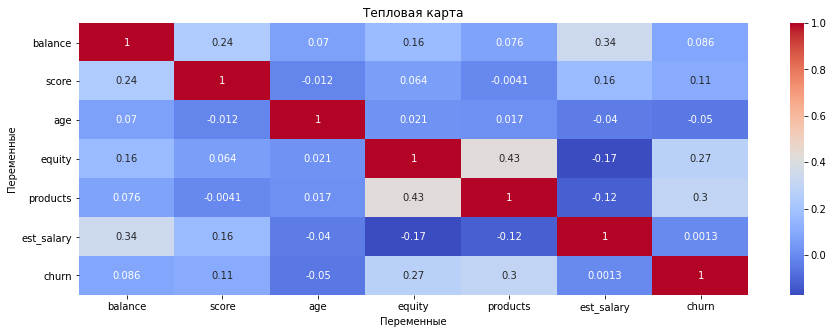

In [29]:
heatmap_columns = ['balance','score','age','equity','products','est_salary','churn']

corr_matrix = data[heatmap_columns].corr()


plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Тепловая карта')
plt.xlabel('Переменные')
plt.ylabel('Переменные')
plt.show()

По тепловой карте видимо, что между числовыми значенимями набора данных не наблюдается сильной зависимости. 

### Вывод 

По данным нам удалось выяснить: 
- клиенты почти в равной мере респределены между мужским и женским полом
- больше половины клиентов используются кредитную карту, а именно 64%
- пользователи предпочитают использовать по 2 продукта банка 
- возрастной диапозон клиентов находится в промежутке между 18 и 86 годами

## Сегментация

Для деления данных на сегменты мы попробуем рассмотреть распределение по продуктам. Мы посмотрим для каждого количества посмотрим распределение данных.

Но для начала определим, как происходит распределение в категориях по уходу пользователей из банка. 

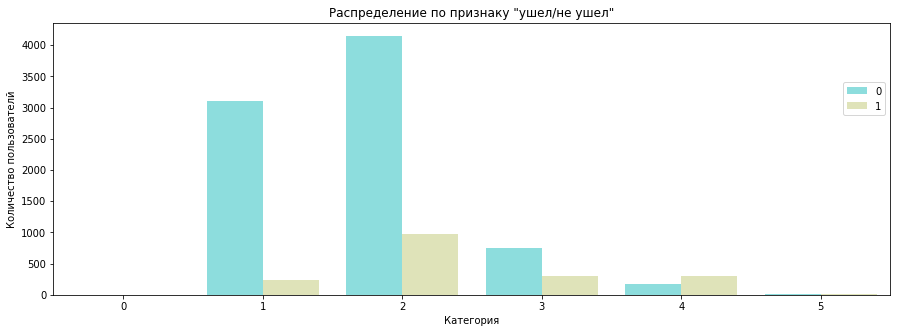

In [30]:
fig = one_plot_creator(
    df = data.groupby(by = ['products','churn'], as_index= False)['user_id'].count(),
    x = 'products',
    y = 'user_id',
    hue = 'churn',
    title = 'Распределение по признаку "ушел/не ушел"', 
    xaxis_title = 'Категория', 
    yaxis_title = "Количество пользователй",
    orientation='v',
)

fig.show()

Очень инетересный факт о том, что люди, которые владеют 4 продуктами банка считаются "ушедшими". В остальном распредление по другим категориям клиенты в большей степени до сих пор являются владельцами банка.

Посмотрим распредление по различным признакам для тех, клиентов, которые находятся в банке по сей день.

Но для начала добавим разделение на группы по заработной плате и возрасту.

In [31]:
data['category_balance'] = ""

for i in range(len(data)):
    if data['est_salary'].iloc[i] <= 80000:
        data['category_balance'].iloc[i] = "до 80к "
    if (data['est_salary'].iloc[i] >= 80001)&(data['est_salary'].iloc[i] <= 140000):
        data['category_balance'].iloc[i] = "от 80к до 140к"
    if (data['est_salary'].iloc[i] >= 140001):
        data['category_balance'].iloc[i] = "от 140к"

data['category_age'] = ""

for i in range(len(data)):
    if (data['age'].iloc[i] >= 18)&(data['age'].iloc[i] <= 31):
        data['category_age'].iloc[i] = "18-31"
    if (data['age'].iloc[i] >= 32)&(data['age'].iloc[i] <= 36):
        data['category_age'].iloc[i] = "32-36"
    if (data['age'].iloc[i] >= 37)&(data['age'].iloc[i] <= 42):
        data['category_age'].iloc[i] = "37-42"
    if (data['age'].iloc[i] >= 43)&(data['age'].iloc[i] <= 52):
        data['category_age'].iloc[i] = "43-52"
    if (data['age'].iloc[i] >= 53):
        data['category_age'].iloc[i] = ">53"

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Мы разделили людей на возрастные группы с примерно одинаковым количеством пользователей внутри.
 * первая группа - с 18 по 31
 * вторая группа - с 32 по 36
 * третья группа - с 37 по 42
 * четвертная группа - с 43 по 52
 * пятая группа - с 53
 
И аналогично разделилили пользователй на группы по зп до 80к,от 80к до 140к и от 140к

### Исследование пользователй, которые пользуются банком

Общее количество пользователей: 8180


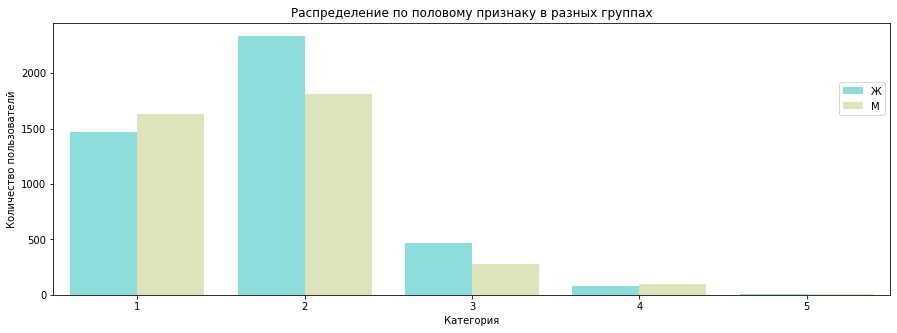

In [32]:
data_new = data[data['churn'] == 0]

print(f'Общее количество пользователей:', data_new['user_id'].count())

fig = one_plot_creator(
    df = data_new.groupby(by = ['products','gender'], as_index= False)['user_id'].count(),
    x = 'products',
    y = 'user_id',
    hue = 'gender',
    title = 'Распределение по половому признаку в разных группах', 
    xaxis_title = 'Категория', 
    yaxis_title = "Количество пользователй",
    orientation='v',
)

fig.show()

Один и четыре продукта больше регистрируют мужчины, а 2 и 3 продукта выбирают девушки. 

Давайте теперь посмотрим, в каких категориях чаще выбирают кредитные карты. 

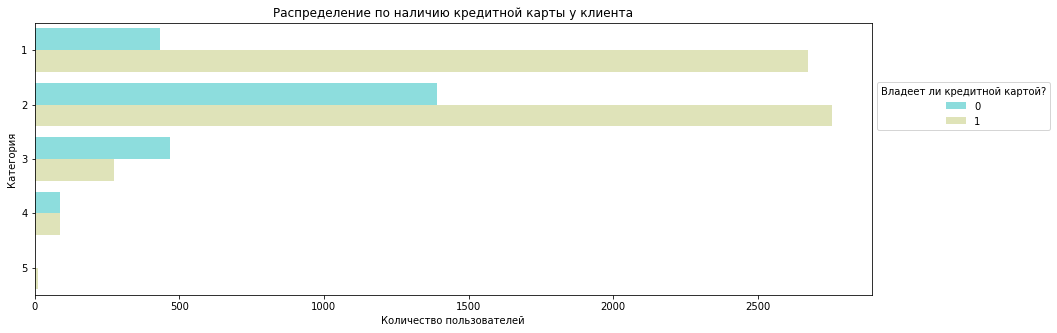

In [33]:
fig = one_plot_creator(
    df = data_new.groupby(by = ['products','credit_card'], as_index= False)['user_id'].count(),
    x = 'user_id',
    y = 'products',
    hue = 'credit_card',
    title = 'Распределение по наличию кредитной карты у клиента', 
    xaxis_title = "Количество пользователей", 
    yaxis_title = 'Категория',
    orientation='h',
    legend_title = "Владеет ли кредитной картой?"
)

fig.show()

Как мы видимо кредитные карты больше имеются у владельцев 1 и 2 продуктов. Те люди, которые имеют один продукт владеют только кредитной картой. Владельце 3 продуктов чаще не имеют кредитных карт.

Давайте посмотрим, какие возраста чаще присутвуют в первой группе и выбирают кредитную карту. 

Пропробуем разделить пользователей на примерно равные возрастные группы, чтобы посмотреть распредление по продуктам для них

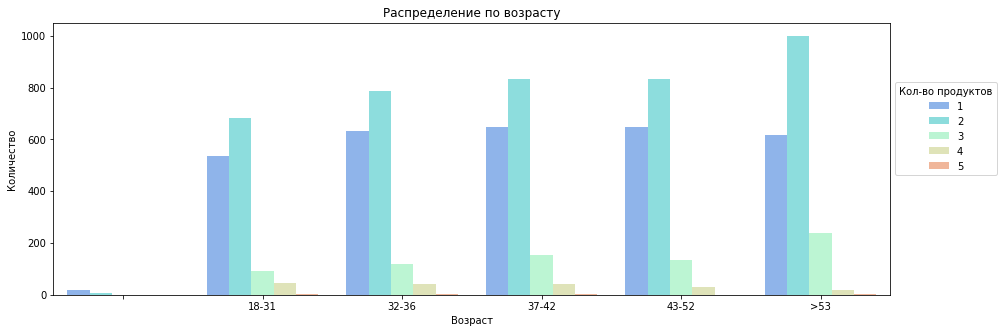

In [34]:
fig = one_plot_creator(
    df = data_new.groupby(by = ['products','category_age'], as_index= False)['user_id'].count(),
    x = 'category_age',
    y = 'user_id',
    hue = 'products',
    title = 'Распределение по возрасту', 
    xaxis_title = "Возраст", 
    yaxis_title = 'Количество',
    orientation='v',
    legend_title = "Кол-во продуктов"
)

fig.show()

Как мы видно из графика больше все клиенты разных возрастных групп предпочитают 2 продукта банка, можно предположить, что это банковская карта, которой клиент пользуется в повседневной жизни (также она может являться и зарплатной картой,то есть на нее перечисляется зарабтная плата). 

Теперь посмотрим лидеров по владению кредитными картам в данных группах. 

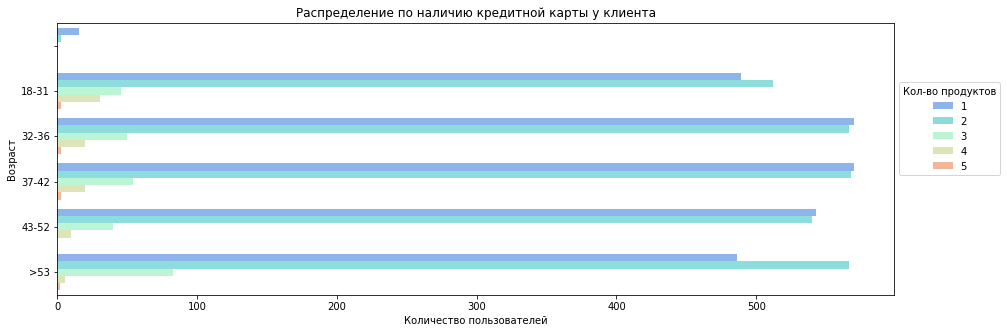

In [35]:
fig = one_plot_creator(
    df = data_new.groupby(by = ['products','category_age'], as_index= False)['credit_card'].sum(),
    x = 'credit_card',
    y = 'category_age',
    hue = 'products',
    title = 'Распределение по наличию кредитной карты у клиента', 
    xaxis_title = "Количество пользователей", 
    yaxis_title = "Возраст",
    orientation='h',
    legend_title = "Кол-во продуктов"
)

fig.show()

Больше всего владеют кредитными картами люди в возрасте 37-42 года, которые имеют 2 продукта банка.
Стоит отметить, что во всех возрастных группах больше всего кредитными картами владеют люди, которые имеют 2 продукта. 

Также много людей из разных возрастных групп владеют и только одной кредитной картой. Лидером является возрастная группа 37-42 года, скорее всего для предложены выгодные условия.



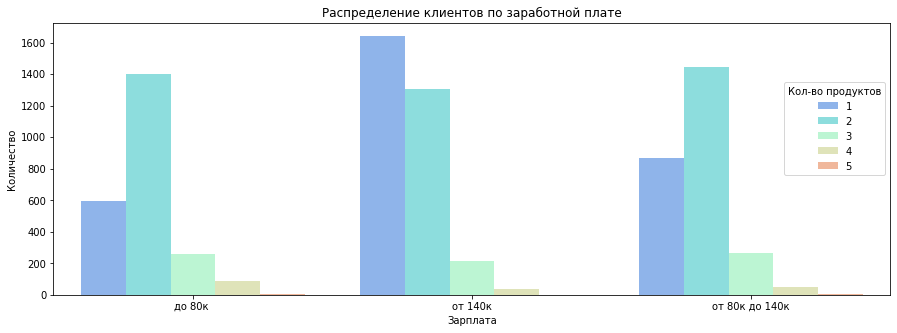

In [36]:
fig = one_plot_creator(
    df = data_new.groupby(by = ['products','category_balance'], as_index= False)['user_id'].count(),
    x = 'category_balance',
    y = 'user_id',
    hue = 'products',
    title = 'Распределение клиентов по заработной плате', 
    xaxis_title = "Зарплата", 
    yaxis_title = "Количество",
    orientation='v',
    legend_title = "Кол-во продуктов"
)

fig.show()

Как и ранее во всех категориях у нас получилось, что чаще всего пользователи выбирают 2 продукта банка. Больше всего таких клиентов с зарплатами до 140к.

Меньше всего клиенты выбирают от 4 до 5 продуктов, во всех категориях данных. Стоит посмотреть распределение кредитных карта в данных категориях, так мы выясним, для кого стоит предлагать льготные предложения по ним.

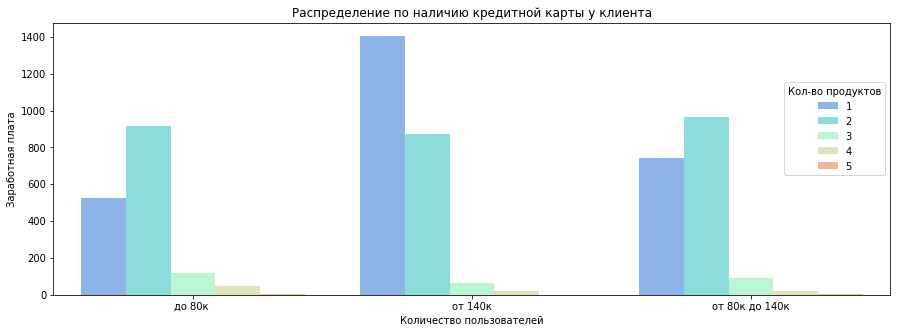

In [48]:
fig = one_plot_creator(
    df = data_new.groupby(by = ['products','category_balance'], as_index= False)['credit_card'].sum(),
    x = 'category_balance',
    y = 'credit_card',
    hue = 'products',
    title = 'Распределение по наличию кредитной карты у клиента', 
    xaxis_title = "Количество пользователей", 
    yaxis_title = "Заработная плата",
    orientation='v',
    legend_title = "Кол-во продуктов"
)

fig.show()

Итак, чаще всего кредитными картами пользуются люди с заработной платой от 80 до 140 тысяч рублей, однако нужно отметить, что отличние между всеми категориями небольшое.

Теперь посмотри распределение по владению объектами недвижемости.

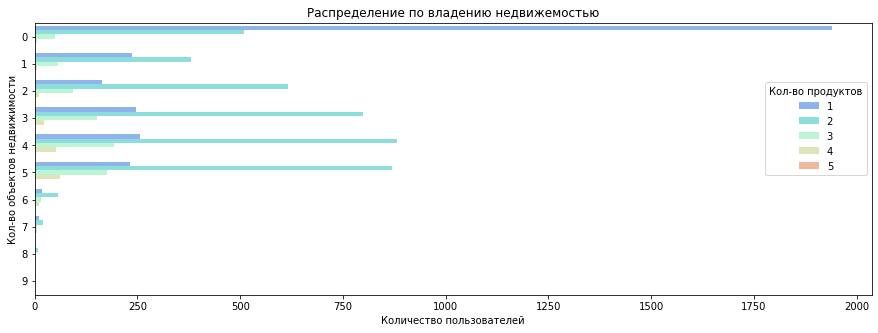

In [38]:
fig = one_plot_creator(
    df = data_new.groupby(by = ['products','equity'], as_index= False)['user_id'].count(),
    x = 'user_id',
    y = 'equity',
    hue = 'products',
    title = 'Распределение по владению недвижемостью', 
    xaxis_title = "Количество пользователей", 
    yaxis_title = "Кол-во объектов недвижимости",
    orientation='h',
    legend_title = "Кол-во продуктов"
)

fig.show()

Больше всего пользователей, не владеют недвижимостью. Люди, которые владеют 4-5 объектами, чаще всего выбирают 2 продукта. 
Много людей также выбирают и 1 продукт, меньше всего выбирают 3 и больше продуктов. 

Люди, которые имеют во владении 7-9 объектов в собственности выбирают также 2 продукта. Посмотрим, как часто люди в таких категориях выбирают кредитные карты

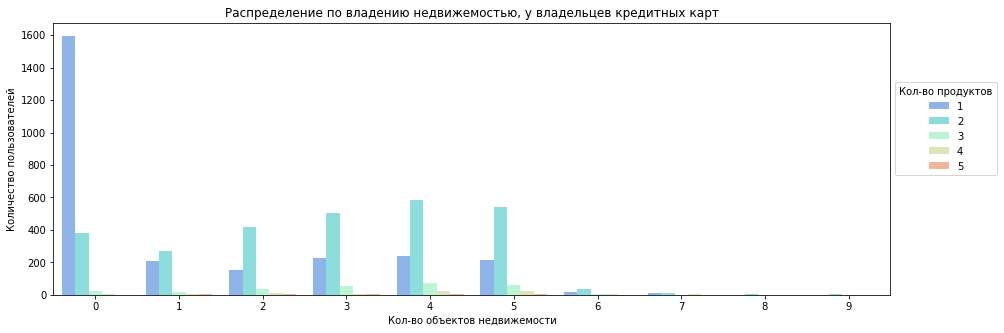

In [40]:
fig = one_plot_creator(
    df = data_new.groupby(by = ['products','equity'], as_index= False)['credit_card'].sum(),
    x = 'equity',
    y = 'credit_card',
    hue = 'products',
    title = 'Распределение по владению недвижемостью, у владельцев кредитных карт', 
    xaxis_title = "Кол-во объектов недвижемости", 
    yaxis_title = "Количество пользователей",
    orientation='v',
    legend_title = "Кол-во продуктов"
)

fig.show()

Ситуция аналогичная с предыдущей: люди, которые владеют кредитными картами чаще имеют 2 продукта банка. Также большое количество и владеют только кредитной картой во всех категория. От 3 и более продуктов банка используют наименше количество клиентов. 
Хотя стоит отметить, что в группе из людей, которые владеют 6 и 7 объектами в собственности довольно часто имеют 4 продукта банка, возможно они покупают страховки для своих объектов недвижимости.

No handles with labels found to put in legend.


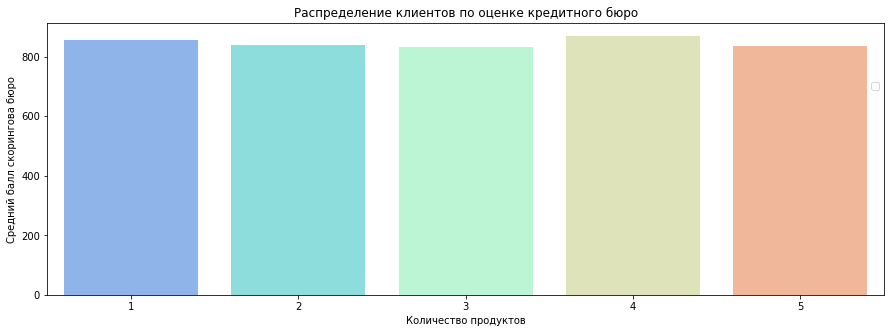

In [54]:
fig = one_plot_creator(
    df = data_new.groupby(by = ['products'], as_index= False)['score'].mean(),
    x = 'products',
    y = 'score',
    #hue = 'products',
    title = 'Распределение клиентов по оценке кредитного бюро', 
    xaxis_title = "Количество продуктов", 
    yaxis_title = "Средний балл скорингова бюро",
    orientation='v',
    #legend_title = "Кол-во продуктов"
)

fig.show()

No handles with labels found to put in legend.


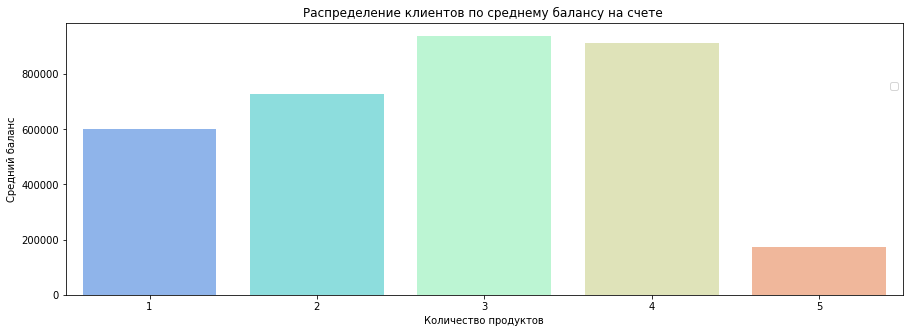

In [57]:
fig = one_plot_creator(
    df = data_new.groupby(by = ['products'], as_index= False)['balance'].mean(),
    x = 'products',
    y = 'balance',
    #hue = 'products',
    title = 'Распределение клиентов по среднему балансу на счете ', 
    xaxis_title = "Количество продуктов", 
    yaxis_title = "Средний баланс",
    orientation='v',
    #legend_title = "Кол-во продуктов"
)

fig.show()

### Исследование клиентов, которые "ушли" из банка

In [41]:
data_old = data[data['churn'] == 1]

print(f'Общее количество ушедших клиентов:', data_old['user_id'].count())

Общее количество ушедших клиентов: 1820


Рассмотрим распределение таких клиентов по возрастным группам и количеству продуктов банка, которые у них были

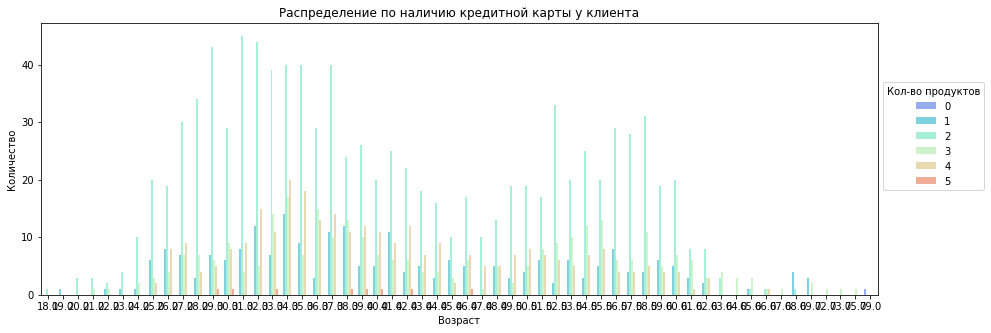

In [47]:
fig = one_plot_creator(
    df = data_old.groupby(by = ['products','age'], as_index= False)['user_id'].count(),
    x = 'age',
    y = 'user_id',
    hue = 'products',
    title = 'Распределение по наличию кредитной карты у клиента', 
    xaxis_title = "Возраст", 
    yaxis_title = 'Количество',
    orientation='v',
    legend_title = "Кол-во продуктов"
)

fig.show()

Ну у нас получается, что клиенты чаще уходят в возрасте от 32-37, но стоит учесть, что их просто больше в наборе данных в целом. А вот пользователей, в возраст от 51 до 60 достаточно мало, однако "уходят" они на почти равно количестве, как и более молодые люди.

Теперь посмотрим распределение по зарплате, возможно там по-другому распределены данные. 

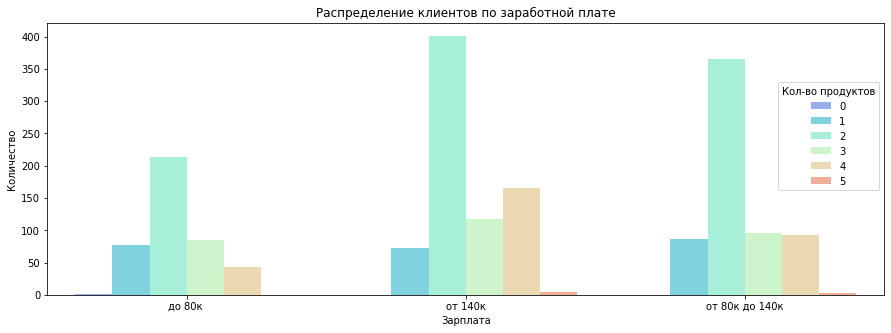

In [45]:
fig = one_plot_creator(
    df = data_old.groupby(by = ['products','category_balance'], as_index= False)['user_id'].count(),
    x = 'category_balance',
    y = 'user_id',
    hue = 'products',
    title = 'Распределение клиентов по заработной плате', 
    xaxis_title = "Зарплата", 
    yaxis_title = "Количество",
    orientation='v',
    legend_title = "Кол-во продуктов"
)

fig.show()

Чаще "уходят" клиенту, которые зарабатывают более 140к. Возможно стоит задумать о лготных программах для таких клиентов. 

Давайте посмотрим еще и распределение по таким клиентам по наличию кредитных карт.

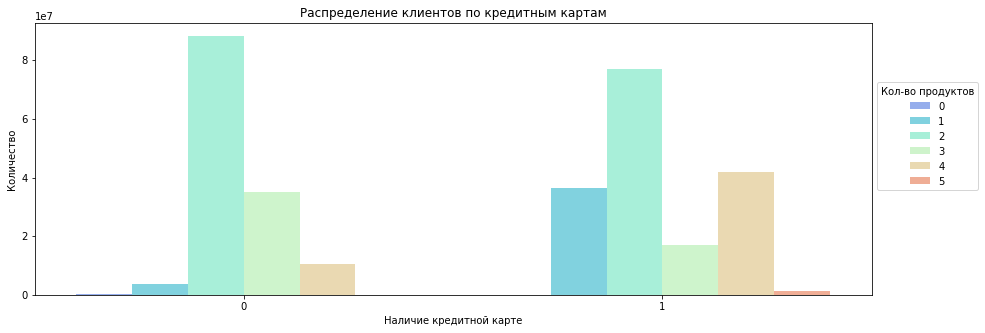

In [46]:
fig = one_plot_creator(
    df = data_old.groupby(by = ['products','credit_card'], as_index= False)['user_id'].sum(),
    x = 'credit_card',
    y = 'user_id',
    hue = 'products',
    title = 'Распределение клиентов по кредитным картам', 
    xaxis_title = "Наличие кредитной карте", 
    yaxis_title = "Количество",
    orientation='v',
    legend_title = "Кол-во продуктов"
)

fig.show()

No handles with labels found to put in legend.


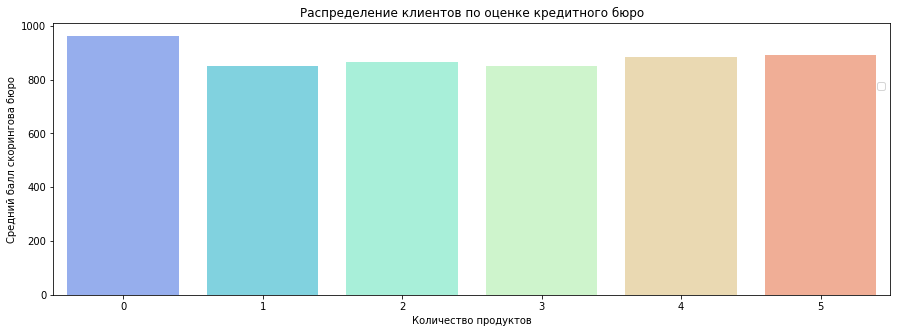

In [51]:
fig = one_plot_creator(
    df = data_old.groupby(by = ['products'], as_index= False)['score'].mean(),
    x = 'products',
    y = 'score',
    #hue = 'products',
    title = 'Распределение клиентов по оценке кредитного бюро', 
    xaxis_title = "Количество продуктов", 
    yaxis_title = "Средний балл скорингова бюро",
    orientation='v',
    #legend_title = "Кол-во продуктов"
)

fig.show()

Больше клиентов, которые ушли из банка владели кредитными картами, возможно им не понравились данные программы. 

### Вывод

Для начала мы разделили клиентов по признаку "ушедший" или нет, чтобы расмотреть их с разных сторон.
Благодаря этому нам удалось выделить сегменты. 

Сегменты: 

   1. Владельцы 1 продуктом -  люди в возрасте от 18 до 86 лет, 1 продуктом банка. Больше всего таких людей в возрастной категории от 32 до 52 лет. Также у этой возрастной группы чаще встречают владельцы кредитной карты с одним продуктом, то есть клиент имеет только вредитную карту. 
   2. Владельцы 2 продуктами - самый большой сегмент пользователей в возрасте от 18 до 86 лет. Большенство людей из этого сеегмента владеют кредитной карты, можно предположить, что у них есть обычная дебетовая карта и кредитная карта. Также клиенты данного сегмента чаще уходят из банка, но стоит отметить, что это и самая многочисленная группа. При рассмотрении по зарплатам, в данном сегменте чаще уходят люди, которые получают от 140к. 
   3. Владельцы 3 продуктами банка - небольшая группа людей, в возрасте от 18 до 86 лет. Из таких клиентов чаще уходят люди, которые не владеют кредитной картой и с зарплатой от 140к. А еще пожилые люди с 64 до 67 лет часто переходят в другой банкт. Среди остальных пользователей у данного сегмента самый высокий средний балас на счете. 
   4. Владельцы 4 продуктов - клиенты в возрасте от 18 до 86 лет, чаще всего с зарплатой до 80к. Среди клиентов, которые владели 4 продуктами чаще всего уходили клиенты от 140к, значительно больше остальных. А вот баланс на счете в среднем занимает второе место. 
   5. Владельцы 5 продуктами - самая немногочисленная группа лиц, которая состоит всего из 19 человек. Все ушедшие из банка клиент, которые владели 5 продуктами имели кредитные карты 

Клиент, который имеет 0 продуктов банка добавлять выделять в сегмент будет нелогично, так возможно это был ошибочный ввод данных.

## Проверка статистических гипотез

### Различие средних значении возраста по кол-ву продуктов.

Проверим гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

***Нулевая гипотеза:*** средний возраст клиентов, которые пользуются двумя продктами банк и клиентами, которые пользуются одним продуктов, не различается

***Альтернативная гипотеза:*** средний возраст клиентов, которые пользуются двумя продуктами банк и клиентами, которые пользуются одним продуктов, различается

In [ ]:
one_product = data[data['products'] == 1]['age']
two_product = data[data['products'] == 2]['age']

t_statistic, p_value = st.ttest_ind(two_product,one_product)


print('Т-статистика:', t_statistic)
print('P-значение:', p_value)

if (p_value < 0.05 ):
    print("Средний возраст различается между клиентами с двумя и одни продуктом")
else:
    print("Средний возраст не различается между клиентами с двумя и одни продуктом")

*Как мы видим при проверке гипотезу средний возраст между клиентами с двуми и одни продуктом не различается, однак стоит отметить, что среднее значение первой выборки(с двумя продуктами) чуть больше среднего значения второй выборки(с одни продуктом)*

### Различие средних балансов на счетах клиентов. 

**Нулевая гипотеза:** средний баланс на счете не различается между клиентами, владеющими кредитными картой, и клиентами, не владеющими кредитной картой 

**Альтернативная гипотеза:** средний баланс на счете различается между клиентами, владеющими кредитной картой, и клиентами, не владеющими кредитной картой. 

In [ ]:
client_with_cc = data[data['credit_card'] == 1]['balance']
client_without_cc = data[data['credit_card'] == 0]['balance']

t_statistic, p_value = st.ttest_ind(client_with_cc,client_without_cc)


print('Т-статистика:', t_statistic)
print('P-значение:', p_value)

if (p_value < 0.05 ):
    print("Баланс на счете различается между клиентами с кредитной кратой и без")
else:
    print("Баланс на счете не различается между клиентами с кредитной кратой и без")

*Как мы видим при проверке гипотезу среднее значение на балансе между клиентами с кредитной картой  и без различается. Значение баланса на счете у клиентов без кредитной карты значительно больше, чем у клиентов с кредитной картой.*

## Общий вывод

В ходе исследования мы: 
 1. Загрузили данные и сделали их предобработку.
    - Проверили данные на наличие дубликатов.
    Удалили полные дубликаты и выявили неявные дубликаты, которые решили не убирать,так как это ценная информация для нашего исследования. 
    - Проверили данные на пропуски и выбросы 
 2. Провели исследовательский анализ данных, из которого нам удалось узнать: 
    - клиенты почти в равной мере респределены между мужским и женским полом
    - больше половины клиентов используются кредитную карту, а именно 64%
    - пользователи предпочитают использовать по 2 продукта банка
    - возрастной диапозон клиентов находится в промежутке между 18 и 86 годами
    Также на тепловой карте мы не увидели зависимостей между числовыми данными клиентов.
 3. Сделали сегментацию клиентов по продуктовому признаку. 
    - Большая часть людей во вмех категориях выбирает 2 продукта, этот показатель сильно выбивается при рассмотрении данных с разных сторон.
    - Есть клиенты, которые владеют только кредитными картами банка и не имеют другой продукции.
    - Часть людей с запрлатой от 80к до 140к предпочитает использоватльзовать кредитные карты
    При рассмотрении клиентов, которые перестали пользоваться услугами банка нам удалось выяснить: 
    - Большой отток пользователей банка произошел в возрастной категории от 51 до 60 лет. 
    - Также большей отток пользователей произошел среди людей, которые зарабатывают 140к 
    - и также больше людей ушло среди владельцев кредитными картами. 
 4. Также мы проверили статическую гипотезу, которая подтвердила, что возраста клиентов, которые пользуются одни и двумя продуктами банка примерно одинаковые 
 
**После исследования нам удалось выделить сегменты**
 
   1. Владельцы 1 продуктом -  люди в возрасте от 18 до 86 лет, 1 продуктом банка. Больше всего таких людей в возрастной категории от 32 до 52 лет. Также у этой возрастной группы чаще встречают владельцы кредитной карты с одним продуктом, то есть клиент имеет только вредитную карту. 
   
   ***Рекомендации.*** Если клиенты, владеют только кредитными картами, что не очень выгодно для банка. Стоит предложить владельцами кредитных карт скидку на обслуживание дебетовых карт или же, например, повышенных кэшбек на покупки. Или льготную ставку по выплатам задолжностей по кредитной карте. 
   
   
   2. Владельцы 2 продуктами - самый большой сегмент пользователей в возрасте от 18 до 86 лет. Большенство людей из этого сеегмента владеют кредитной карты, можно предположить, что у них есть обычная дебетовая карта и кредитная карта. Также клиенты данного сегмента чаще уходят из банка, но стоит отметить, что это и самая многочисленная группа. При рассмотрении по зарплатам, в данном сегменте чаще уходят люди, которые получают от 140к. 
   
   ***Рекомендации.*** Не могу выделить каких-либо рекомендации, так клиенты итак отлично пользуются услугами банка. Разве что можно делать краткосрочные предложения, как месяц бесплатного обслуживания для клиентов, которые хотят уйти из банка. 
   
   
   3. Владельцы 3 продуктами банка - небольшая группа людей, в возрасте от 18 до 86 лет. Из таких клиентов чаще уходят люди, которые не владеют кредитной картой и с зарплатой от 140к. А еще пожилые люди с 64 до 67 лет часто переходят в другой банкт. Среди остальных пользователей у данного сегмента самый высокий средний балас на счете. Так как в данном сегменте достаточно мало людей, которые зарабатывюат от 140к, к тому же они чаще уходят. Стоит сделать акцент на предложения для них. Также стоит обратить внимание, что в сегменте много пожилых людей в возрасте от 53 лет. 
    
   ***Рекомендации.*** Можно предложить клиентам, которые зарабатывают от 140к пониженную ставку по кредиту или бесплатное обслуживание карты. Для пожилых людей стоит сделать предложение по вкладам, так как их может это заинтересовать. Или предложить скидку по оплате картой банка в каком-то популярном продуктовом магазине.
    
   
   4. Владельцы 4 продуктов - клиенты в возрасте от 18 до 86 лет, чаще всего с зарплатой до 80к. Среди клиентов, которые владели 4 продуктами чаще всего уходили клиенты от 140к, значительно больше остальных. А вот баланс на счете в среднем занимает второе место. 
    
   ***Рекомендации.*** Стоит предложить для клиентов, которые зарабытвают от 140к, присвоить статус vip-клиентов, на месяц или год, чтобы они почувствовали на сколько они важны банку, или предложить льготную ставку по вкладам. 
    
   
   5. Владельцы 5 продуктами - самая немногочисленная группа лиц, которая состоит всего из 19 человек. Все ушедшие из банка клиент, которые владели 5 продуктами имели кредитные карты
   
    
   ***Рекомендации.***  Нельзя выделить особенных рекомендации, так как клиенты итак достаточно хорошо пользуются продуктами банка, поэтому стоит обратить внимание на ушедших или уходящих клиентов из данного сегменты. Можно предложить им статус vip-клиентов на какой-то период или сделать льготный период по оплате кредитной карты/кредита, как бы заморозку, в которую они могу не платить. 


Ссылка на презентацию: https://disk.yandex.ru/d/LzaheifXjIxa2g
Ссылка на дашборд: https://public.tableau.com/app/profile/nadya.loseva/viz/Book1_16859716554970/Dashboard1?publish=yes